У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

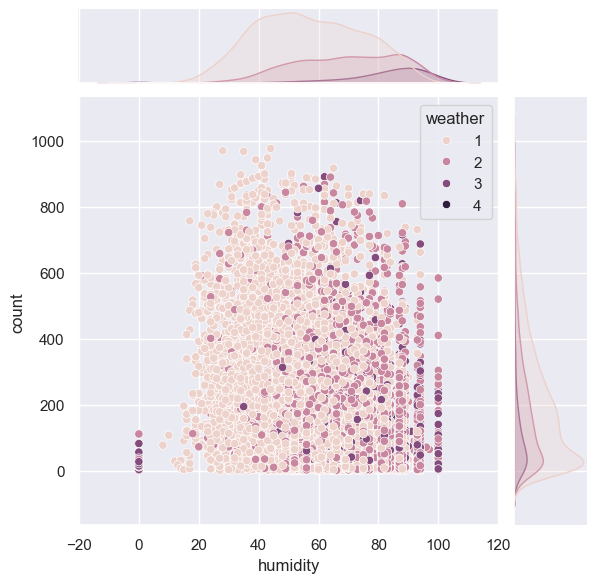

In [19]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

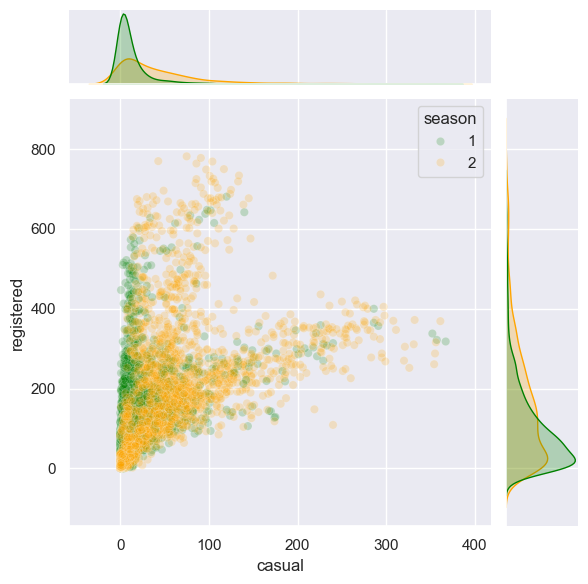

In [32]:
df_filtered = df[df['season'].isin([1, 2])]
season_palette = {1: 'green', 2: 'orange'}
sns.jointplot(data=df_filtered, x='casual', y='registered', hue='season', alpha=.2,
             palette=season_palette);

In [21]:
#для більшого розуміння поведінки користувачів додатково дізналася період
start_date = df['datetime'].min()
end_date = df['datetime'].max()

print(f"Дані зібрані за період: з {start_date} до {end_date}")

Дані зібрані за період: з 2011-01-01 00:00:00 до 2012-12-19 23:00:00


За графіком можемо зробити висновок, що весною більший попит серед всіх користувачів. Якщо порівнювати між зареєстрованими і ні, то попит більший серед неформальних користувачів і він набагато більший навесні. Дуже цікаво було дізнатися окремо по рокам за 2011 та 2012 рік ситуація повторювалася чи можливо активній спостерігалася в який один рік?!
Що можемо сказати по зареєстрованим користувачам, що вони більш стабільні користувачі і скачок не настільки великий в порівнянні.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


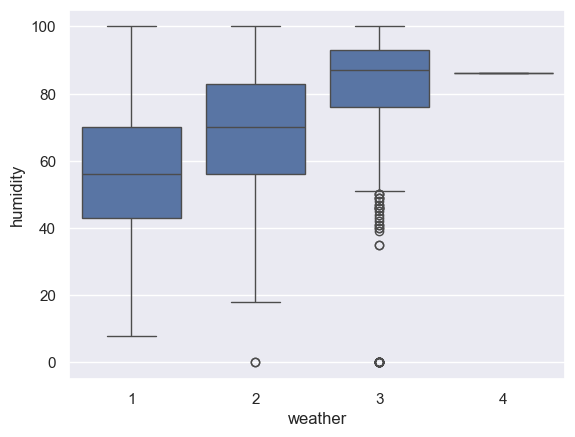

In [22]:
sns.boxplot(data=df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

<Figure size 500x500 with 0 Axes>

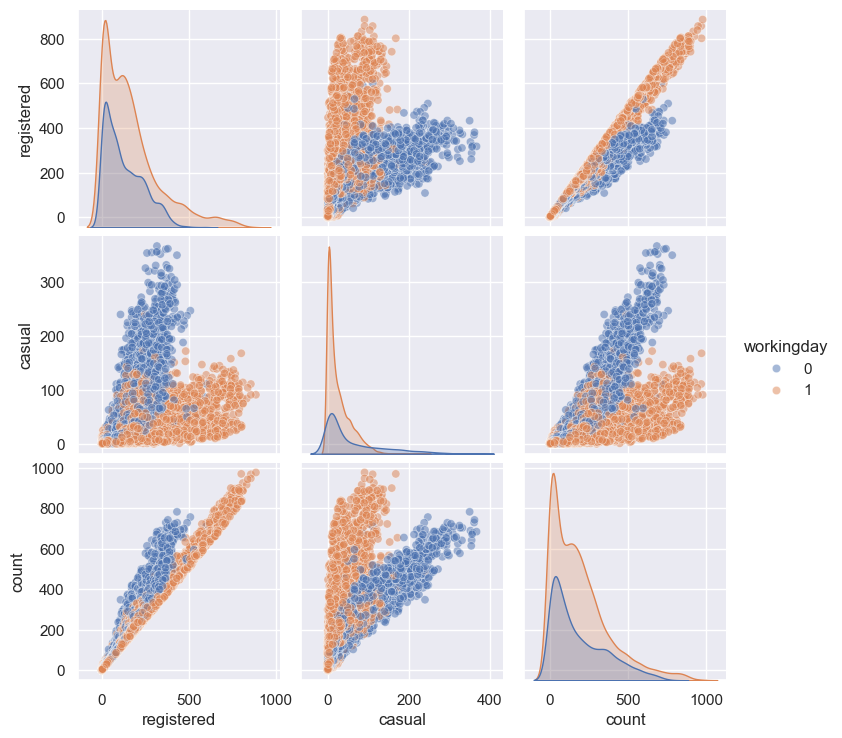

In [23]:
selected_columns = ['registered', 'casual', 'count', 'workingday']
filtered_df = df[selected_columns]
plt.figure(figsize=(5,5))
sns.pairplot(data=filtered_df, vars=['registered', 'casual', 'count'], hue='workingday', plot_kws={'alpha': 0.5});

### Взаємозв'язок між registered і count:
- Можемо помітити,що зареєстровані користувачі використовують сервіс частіше в будні дні, отже, можемо зробити висновок, що користувачі використовують велосипед,  щоб дістатися до роботи.
- Також можемо бачити лінійну залежність на цьому графіку,що кількість велосипедів залежить від кількості користувачів.

### Взаємозв'язок між casual і count:
- Неформальні користувачі використовують сервіс більше у вихідні дні, отже, можемо зробити висновок, вони використовують велосипед для дозвілля.

### Розподіл registered і casual:
- Зареєстровані користувачі використовують сервіс частіше в робочі дні, тоді як неформальні користувачі у неробочі дні

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [24]:
df.datetime = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [25]:
df['date'] = df.datetime.dt.date

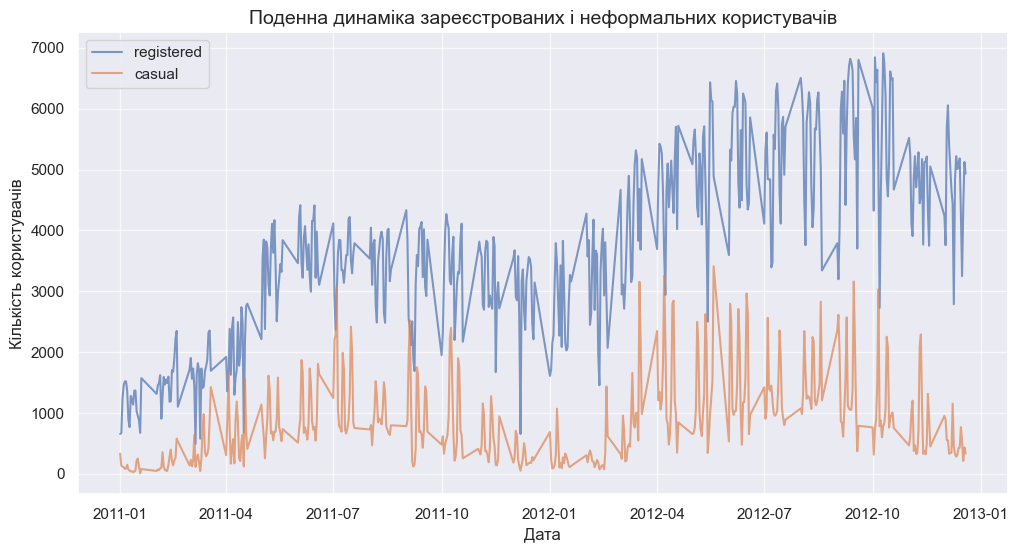

In [30]:
df_viz = df[['date', 'registered', 'casual']]
df_viz = df_viz.groupby('date').sum().reset_index()

ax = df_viz.plot(x='date', y=['registered', 'casual'], kind='line', figsize=(12, 6), alpha=.7)
ax.set_title('Поденна динаміка зареєстрованих і неформальних користувачів', fontsize=14)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Кількість користувачів', fontsize=12)

plt.grid(axis='both', alpha=.7)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)


<Axes: xlabel='date'>

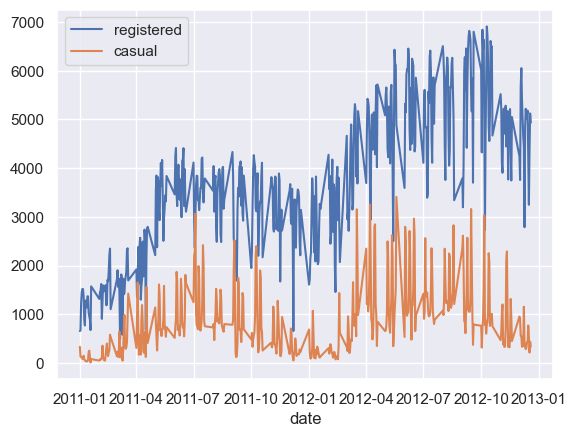

In [28]:
df_viz = df[['date', 'registered', 'casual']].groupby('date').sum()
df_viz.plot()